In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import math
import seaborn as sns
%matplotlib inline

## 3. 探索式分析(EDA)

### 3.1 针对时间序列的特殊方法
#### 3.1.1 理解平稳性

<AxesSubplot:title={'center':'a10 - Drug Sales Series'}, xlabel='date'>

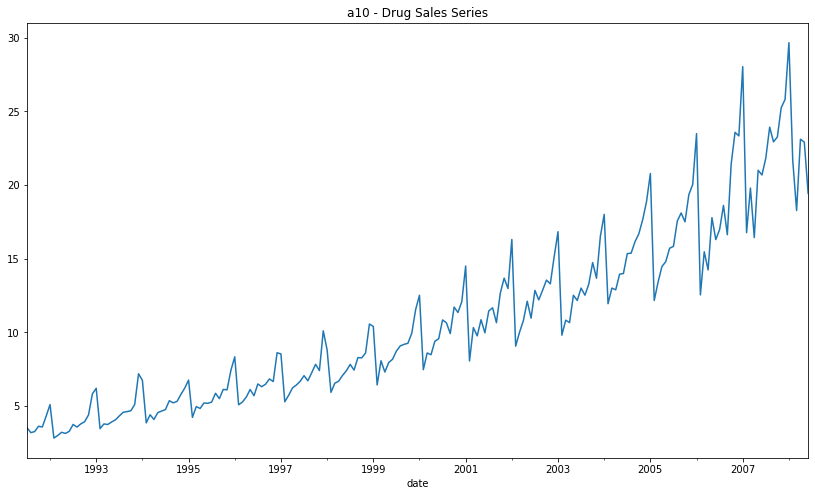

In [13]:
# 导入原始数据
url = 'data/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series')

In [19]:
# 使用ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: 3.1451856893067363
n_lags: 1.0
p-value: 1.0


**p值为1表示没有理由拒绝原假设，也就是存在单位根，时间序列非平稳，这也和我们的直觉是相符的**

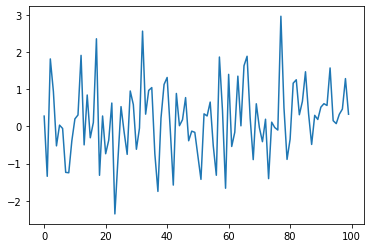

In [22]:
# 生产一组随机数检验平稳性
series1 = np.random.randn(100)
plt.plot(series1)

In [20]:
result1 = adfuller(series1, autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

ADF Statistic: -9.588680806555054
p-value: 2.0639843020333296e-16


**p值远远小于0.05，表示拒绝原假设，即时间序列是平稳的**

#### 3.1.2 寻找自相关

**ACF & PACF**

In [3]:
# 导入气温数据
series = pd.read_csv('data/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

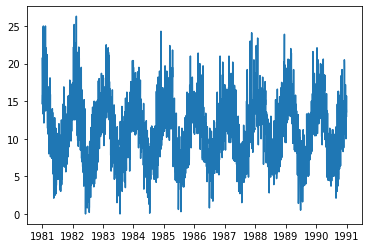

In [4]:
# 画出最低气温时间序列
plt.plot(series)

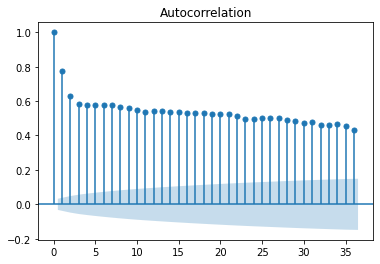

In [5]:
# 画出acf函数
# 蓝色底色区域内画出的是95%置信区间，数据落在蓝色区域内表示在统计学意义上在x轴的时间间隔下具有自相关性
plot_acf(series)
plt.show()

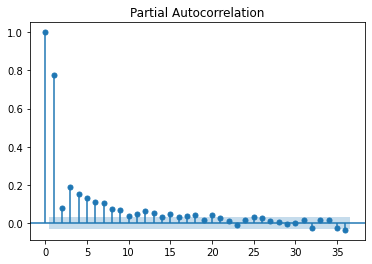

In [6]:
# 画出pacf函数
plot_pacf(series)
plt.show()

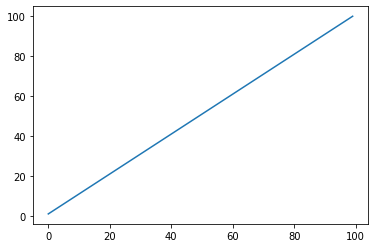

In [7]:
# 构造一个非平稳线性增长时间序列
x= np.linspace(1,100,100)
plt.plot(x)

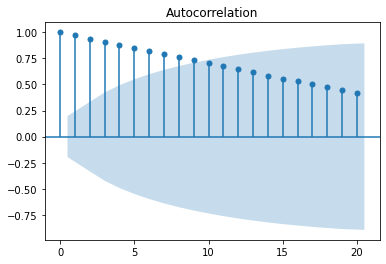

In [8]:
plot_acf(x)
plt.show()

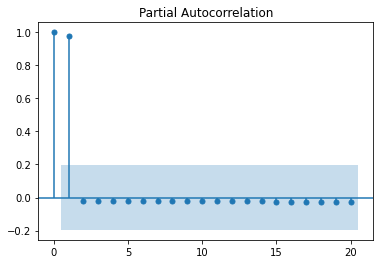

In [10]:
plot_pacf(x)
plt.show()
# 从这个例子可以看到，从lag>=2开始，pacf值几乎都等于0，而lag=1时的pacf值近似于1，这说明所有的相关性都可以在间隔=1加以解释，后面的时间序列只是产生了大量的冗余信息，并没有新的信息